# Process BayeScan outlier test
Outlier analysis performed on 10kb thinned kin-removed data
```bash
BayeScan2.1 $1 \
	-o bft_bscan \
	-n 15000 \
	-pilot 15000 \
	-burn 100000 \
	-pr_odds 100 \
	-threads $2 \
```

## Setup environment

In [2]:
library(coda)

#### Plot function provided by Bayescan

In [2]:
plot_bayescan<-function(res,FDR=0.05,size=1,pos=0.35,highlight=NULL,name_highlighted=F,add_text=T){
    if (is.character(res))
    res=read.table(res)

    colfstat=5
    colq=colfstat-2

    highlight_rows=which(is.element(as.numeric(row.names(res)),highlight))
    non_highlight_rows=setdiff(1:nrow(res),highlight_rows)

    outliers=as.integer(row.names(res[res[,colq]<=FDR,]))

    ok_outliers=TRUE
    if (sum(res[,colq]<=FDR)==0)
        ok_outliers=FALSE;

    res[res[,colq]<=0.0001,colq]=0.0001

    # plot
    plot(log10(res[,colq]),res[,colfstat],xlim=rev(range(log10(res[,colq]))),xlab="log10(q value)",ylab=names(res[colfstat]),type="n")
    points(log10(res[non_highlight_rows,colq]),res[non_highlight_rows,colfstat],pch=19,cex=size)

    if (name_highlighted) {
        if (length(highlight_rows)>0) {
            text(log10(res[highlight_rows,colq]),res[highlight_rows,colfstat],row.names(res[highlight_rows,]),col="red",cex=size*1.2,font=2)
        }
    }
    else {
        points(log10(res[highlight_rows,colq]),res[highlight_rows,colfstat],col="red",pch=19,cex=size)
        # add names of loci over p and vertical line
        if (ok_outliers & add_text) {
            text(log10(res[res[,colq]<=FDR,][,colq])+pos*(round(runif(nrow(res[res[,colq]<=FDR,]),1,2))*2-3),res[res[,colq]<=FDR,][,colfstat],row.names(res[res[,colq]<=FDR,]),cex=size)
        }
    }
    lines(c(log10(FDR),log10(FDR)),c(-1,1),lwd=2)

    return(list("outliers"=outliers,"nb_outliers"=length(outliers)))
}

Import files

In [3]:
bft_bscan_fst <- read.csv("bft_bscan_fst.txt", sep="")
locinames <- readLines("../../data/snp.names")

## Check Convergence

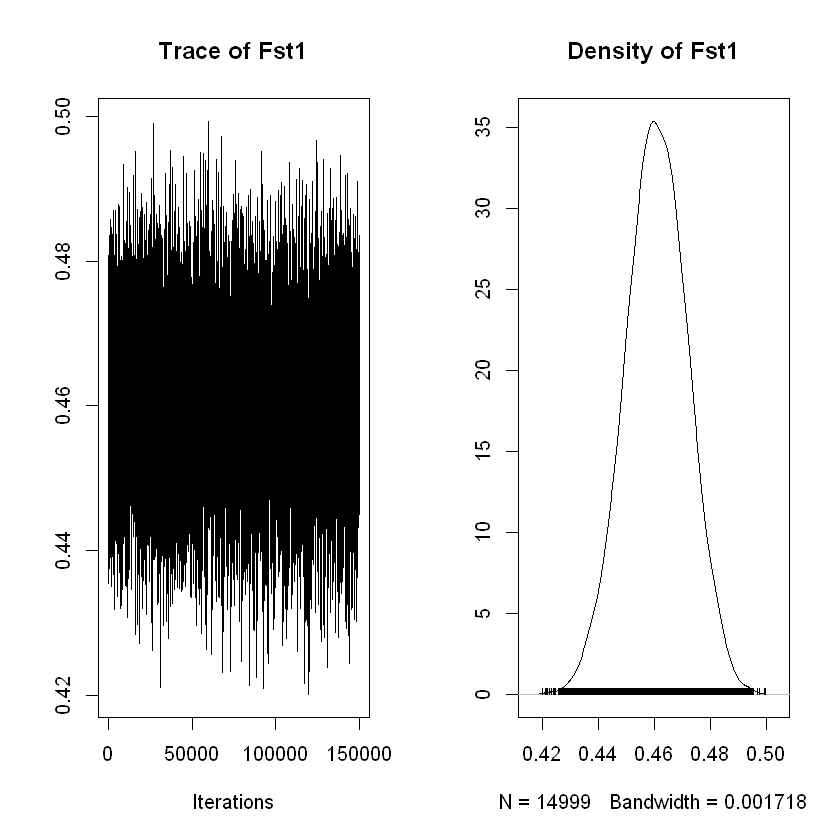

In [4]:
chain <- read.table("bft_bscan.sel", header = TRUE)
chain <- chain[-c(1)]
mc_chain <- mcmc(chain, thin = 10)
plot(mc_chain)

In [5]:
summary(mc_chain)


Iterations = 1:149981
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 14999 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     4.607e-01      1.109e-02      9.056e-05      1.333e-04 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.4384 0.4533 0.4607 0.4682 0.4824 


In [6]:
autocorr.diag(mc_chain)


,Fst1
Lag 0,1.000000000
Lag 10,0.368204003
Lag 50,0.008049790
Lag 100,0.007458078
Lag 500,-0.004452398


In [7]:
effectiveSize(mc_chain)

Fst1 
6925.631

In [8]:
geweke.diag(mc_chain, frac1 = 0.1, frac2 = 0.5)


Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

Fst1 
2.45 


In [9]:
heidel.diag(mc_chain, eps=0.1, pvalue = 0.05)

                                   
     Stationarity start     p-value
     test         iteration        
Fst1 passed       1501      0.146  
                              
     Halfwidth Mean  Halfwidth
     test                     
Fst1 passed    0.461 0.000277 

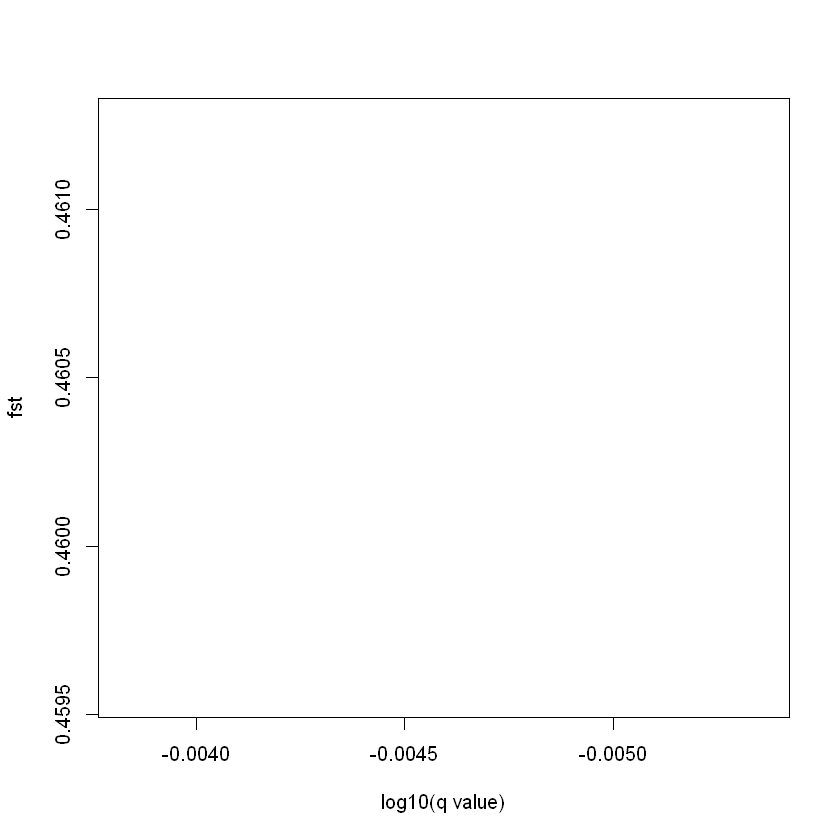

In [10]:
plt <- plot_bayescan("bft_bscan_fst.txt",0,FDR=0.05)

In [11]:
outliers <- bft_bscan_fst[bft_bscan_fst$qval<=0.05,]
outliers

prob,log10.PO.,qval,alpha,fst
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Bayescan did not detect any outliers